# ***Data Analysis***
***

**Background**
----

As one of the busiest city in the world, NYC's street are synonymous with it's high-paced mobility. One of this traits are represented in the numerous quantity of public transportation, like subway, trems and buses, but the most iconic has to be the NYC's yellow taxi. These cabs are a testament to New York's inclusivity, welcoming passengers from all walks of life, from wall street executives to tourists navigating the city's concrete jungle streets.  Behind this armada of yellow automobile, there are regulators in the form of the Taxi and Limousine Commision (TLC), that oversees all the operations of the NYC taxi cabs.  


**Problem Identification**
------

As one of the backbone of NYC's economics, public transportation is a dynamic and ever-evolving subject of the city's infrastructure. So continuous innovation and improvement of the public transportation system are crucial to meeting the needs of the city's residents and visitors. These taxi cabs are not just a public transportation, rather it is a representation of NYC's culture and diversity. However with the highly populated and never-ending urbanization. 

And as new products and iteration of these public transportations keeps on coming, TLC needs to innovate and maintain the high status and reputation of these green and yellow taxis by always innovating on their products and servies. 

The objective of this analysis is to provide insights that will empower the TLC and emerging taxi companies to better comprehend the demographics and behaviors of their service users, thus enabling more informed decision-making and continued service improvement

**Limitations**
------
- This project's dataset are limited only to January 2023.
- There are no further data about the individual demographic of each passengers.
- There are no other public transportation datasets used as comparisons

## About Data

**Importing data**

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

***Data Understanding***

These are the data of the trips recorded by the NYC TLC. Consisting the data of taxi trips in January of 2023.


In [95]:
df = pd.read_csv('data/NYC TLC Trip Record (CLEAN).csv')
df.head()

,PUdate,DOdate,PUtime,DOtime,day,RatecodeID,PUzone,PUborough,DOzone,DOborough,duration_min,passenger_count,trip_distance,fare_amount,tip_amount,congestion,total_amount,payment_type,trip_type
0,2023-01-01,2023-01-01,00:01:31,00:16:02,Sunday,Standard rate,Morningside Heights,Manhattan,Washington Heights South,Manhattan,14.52,1.0,2.48,16.3,3.76,0.0,22.56,Credit card,street hail
1,2023-01-01,2023-01-01,00:04:25,00:17:50,Sunday,Standard rate,Williamsburg (North Side),Brooklyn,Long Island City/Queens Plaza,Queens,13.42,1.0,2.80,16.3,2.80,0.0,21.60,Credit card,street hail
2,2023-01-01,2023-01-01,00:08:05,00:13:26,Sunday,Standard rate,Central Harlem,Manhattan,East Harlem South,Manhattan,5.35,4.0,1.05,5.5,1.36,0.0,8.16,Credit card,street hail
3,2023-01-01,2023-01-01,00:08:43,00:17:08,Sunday,Standard rate,East Harlem South,Manhattan,Lenox Hill East,Manhattan,8.42,1.0,1.99,11.4,3.33,1.0,19.98,Credit card,street hail
4,2023-01-01,2023-01-01,00:09:14,00:26:39,Sunday,Standard rate,Park Slope,Brooklyn,Chinatown,Manhattan,17.42,2.0,3.80,19.1,4.85,1.0,29.20,Credit card,street hail


- `PUdate`: The date on which the taxi trip was picked up.
- `DOdate`: The date on which the taxi trip was dropped off.
- `PUtime`: The time of day (hours) the taxi trip was picked up.
- `DOtime`: The time of day (hours) the taxi trip was dropped off.
- `day`: The day in which the taxi trip occurred.
- `RatecodeID`: The rate code or payment rate used for the taxi trip.
- `PUzone`: The specific pickup zone or location where the passenger was picked up.
- `PUborough`: The borough of NYC where the pickup occurred.
- `DOzone`: The specific dropoff zone or location where the passenger was dropped off.
- `DOborough`: The borough of NYC where the dropoff occurred.
- `duration_min`: The duration (minutes) of the taxi trip.
- `passenger_count`: The number of passengers in the taxi.
- `trip_distance`: The distance traveled (miles) during the taxi trip.
- `fare_amount`: The base fare amount charged for the taxi trip.
- `tip_amount`: The amount of tip or gratuity added to the fare by the passenger.
- `congestion`: Represent a measure of traffic congestion during the trip.
- `total_amount`: The total cost of the taxi trip, including the base fare, additional charges, and tips.
- `payment_type`: The method of payment used for the taxi trip (does not include cash tip)
- `trip_type`: A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.

In [96]:
# reformatting these columns to datetime format
df = df.astype({
    'PUtime': 'datetime64[s]',
    'PUdate': 'datetime64[s]',
    'DOtime': 'datetime64[s]',
    'DOdate': 'datetime64[s]'})

# making new supporting columns for analysis
df['weekday/end'] = np.where(df['day'].isin(['Saturday','Sunday']),'Weekend','Weekday')
df['hour'] = df['PUtime'].dt.hour
df['other_fare'] = df['total_amount'] - (df['tip_amount'] + df['fare_amount'])
df['tip%'] = (df['tip_amount'] / df['total_amount']) * 100 # tip % to total amount"

- `hour`: the hour of the day.
- `weekday/end`: Whether the trip was done in Weekday or Weekend.
- `other_fare`: The extra cost of taxi trips that are charged (tax, toll  and extra charges)
- `tip%`: Tip amount ratio to total amount

**To know more about the data you can read the pdf file in `guidelines\Guideline.pdf`**

*supporting variables*

In [97]:
# sorting list for categorical datas
boroughsFull = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx','Staten Island', 'EWR']
df['DOborough'] = pd.Categorical(df['DOborough'], categories=boroughsFull, ordered=True)
df['PUborough'] = pd.Categorical(df['PUborough'], categories=boroughsFull, ordered=True)
boroughs = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx']
viridis = plt.cm.viridis(np.linspace(0, 1, 6))
lengthsorted = ['Very Short','Short','Medium','Long','Very Long'] 
classsorted = ['Cash','No tip','Modest','Moderate','Generous','Very Generous']
daysorted = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

## **Data Analysis** 

### ***NYC's Culture Towards Taxi Rides***

New York City are a very large state consisting of very diverse number of people, NYC are made up of 5 major borough that is Manhattan, Brooklyn, Queens, the Bronx and Staten Island. Separated by sprawling urban landscapes and meandering rivers, these boroughs have their own society, culture and stereotypes. These unique cultural differences plays a pivotal role in unraveling the approach of these New Yorker when it comes to their habit of public trasportarion.

[About NYC's boroughs](https://www.pods.com/blog/nyc-moving-guide-the-new-york-city-boroughs-explained)

In [98]:
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
boroughsloc = {
    'Manhattan': {'location': [40.7831, -73.9712]},
    'Brooklyn': {'location': [40.6782, -73.9442]},
    'Queens': {'location': [40.7282, -73.7949]},
    'The Bronx': {'location': [40.8448, -73.8648]},
    'Staten Island': {'location': [40.5795, -74.1502]}
}

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i, (borough, data) in enumerate(boroughsloc.items()):
    folium.Marker(
        location=data['location'],
        popup=borough,
        icon=folium.Icon(color=colors[i])
    ).add_to(nyc_map)

nyc_map



**First let's take a look at their proportion of total trips**, this will show how much each borough contributes to the total of taxi trips pickups in their areas

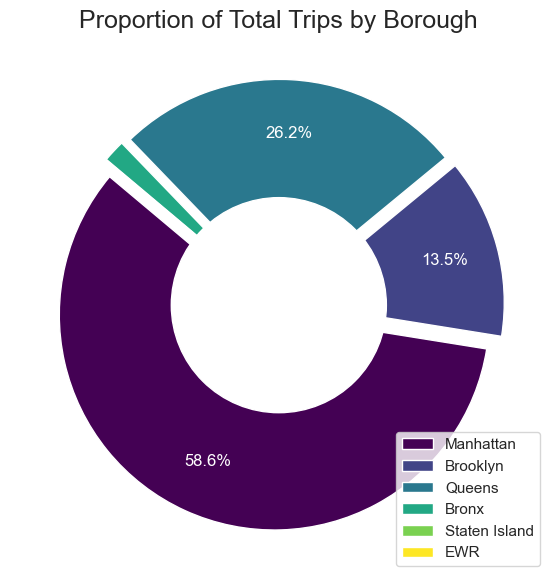

In [99]:
# grouping trips by borough
tripsbyborough = pd.DataFrame(df.groupby(by=['PUborough', 'DOborough'])['PUdate'].count().reset_index())
tripsbyborough = tripsbyborough.rename(columns={'PUdate': 'total trips'})
tripsbyborough = tripsbyborough.groupby(by='PUborough')['total trips'].sum().to_frame()
total_trips = tripsbyborough['total trips']


# filtering the autopct, so that only the top 3 value are shown
largest_indices = sorted(range(len(total_trips)), key=lambda i: total_trips[i], reverse=True)[:3]
autopct_labels = ['%1.1f%%' % (val / sum(total_trips) * 100) if i in largest_indices else '' for i, val in enumerate(total_trips)]

# creating a pie chart
plt.figure(figsize=(6, 6))
plt.pie(tripsbyborough['total trips'], 
autopct=lambda x: autopct_labels.pop(0), 
# autopct='%1.2f%%',
startangle=140, pctdistance=0.75, textprops={'color': 'white'}, 
colors=viridis, explode=[0.05]*len(tripsbyborough))
plt.title('Proportion of Total Trips by Borough', fontsize=18)

# adding center circle
fig = plt.gcf()
centre_circle = plt.Circle((0,0), 0.5, fc='white')
fig.gca().add_artist(centre_circle)
plt.tight_layout()

plt.legend(labels=tripsbyborough.index, loc='lower right')
plt.show()

**From this graphic we can conclude:**
- Taxi trips in NYC are not very well distributed in every boroughs.
- More than half of the taxi trips recorded are from Manhattan (58.6%).
- These proportions are followed by Queens (26.2%) and Brooklyn (13.5%) with a significant decrease.
- Staten Island (0.02%) and Bronx (1.65%) does not contribute much taxi trips in NYC.


**Analyzing NYC Fare Revenue Distribution**, this will show how much each borough contributes to the total fare revenue of taxi trips in their areas.

In [100]:
# Grouping fare amount by Borough
farebyborough = pd.DataFrame(df.groupby(by=['PUborough', 'DOborough'])['fare_amount'].sum())
farebyborough = farebyborough.rename(columns={'fare_amount': 'fare value'})

farebyboroughAll =  farebyborough.groupby(by='PUborough')['fare value'].sum().to_frame().reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

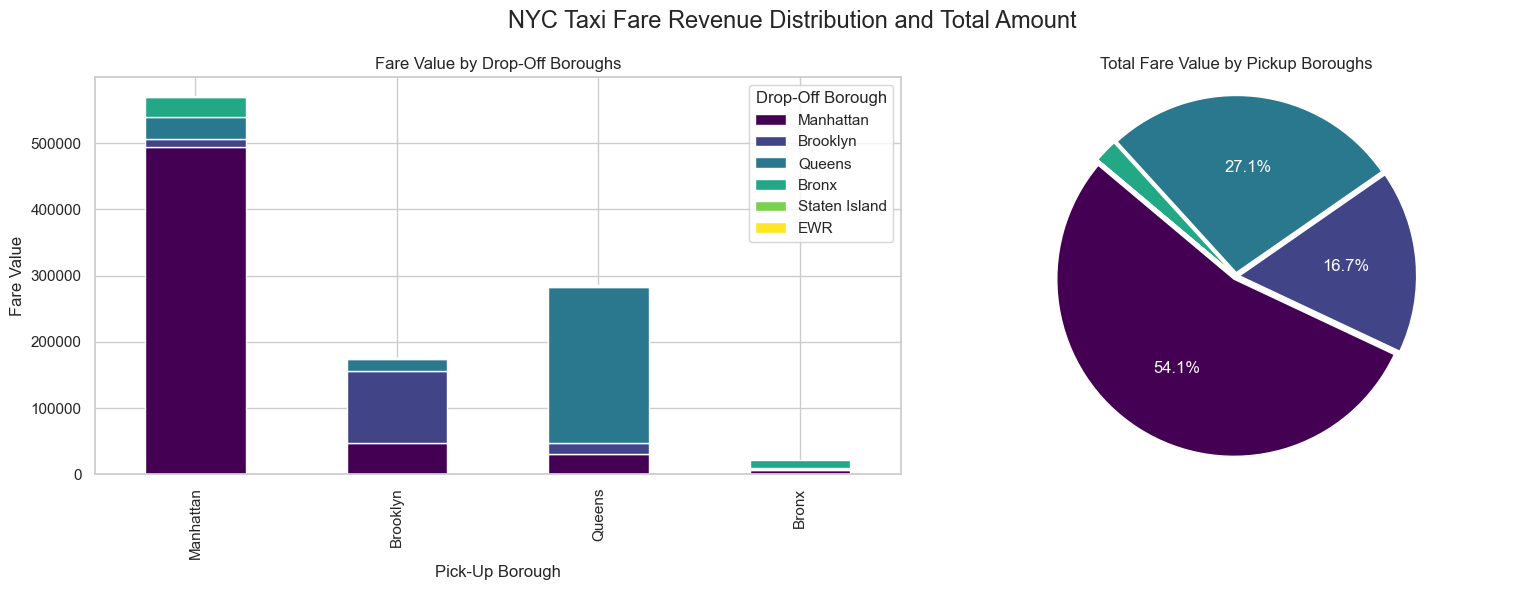

In [101]:
# making a  subplots of NYC fare datas
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1.5, 1]})
plt.suptitle('NYC Taxi Fare Revenue Distribution and Total Amount',size=17)

fare_value = farebyboroughAll['fare value']
PUborough = farebyboroughAll['PUborough']

# 
largest = sorted(range(len(fare_value)), key=lambda i: fare_value[i], reverse=True)[:3]
autopct= ['%1.1f%%' % (val / sum(fare_value) * 100) if i in largest else '' for i, val in enumerate(fare_value)]
explode = [0.02] * len(farebyboroughAll)

# pie chart to show the distribution
axes[1].pie(fare_value, labels=PUborough, autopct=lambda x: autopct.pop(0), startangle=140, colors=viridis, explode=explode,  textprops={'color': 'white', 'fontsize': 12})
axes[1].axis('equal')
axes[1].set_title('Total Fare Value by Pickup Boroughs')

# farebyborough = farebyborough[farebyborough.index != 'EWR']
pivoted = farebyborough.pivot_table(index='PUborough', columns='DOborough', values='fare value', aggfunc='sum', fill_value=0)
pivoted.drop(index=['EWR','Staten Island'], inplace=True) # dropping EWR and Staten Island because the value proportion are too low to visualize
# stacked bar chart show the fare proportion from each destination borough 
pivoted.plot(kind='bar', stacked=True, ax=axes[0], color=viridis)

# Customize the chart
axes[0].set_xlabel('Pick-Up Borough')
axes[0].set_ylabel('Fare Value')
axes[0].set_title('Fare Value by Drop-Off Boroughs')
axes[0].legend(title='Drop-Off Borough')

plt.tight_layout()
plt.show


**From this graphic we can conclude:**
- Linear to the total trips, Manhattan still holds the most contribution to the fare revenue generated by this taxi trips.
- Brooklyn's proportion towards the fare revenue increases by (2.6%) from the total trips.
- Most of these trips are done intra-district, meaning that the trips are more likely to occur inside the same borough.
- Brooklyn has a larger contribution of inter-district travels, mainly towards Manhattan.
- Manhattan has the most significance in terms of being a inter-city trips destinations.


**Pickup to Dropoff Ratio**, this ratio will show for each borough, how many people are going in and out using taxis.

<Figure size 500x500 with 0 Axes>

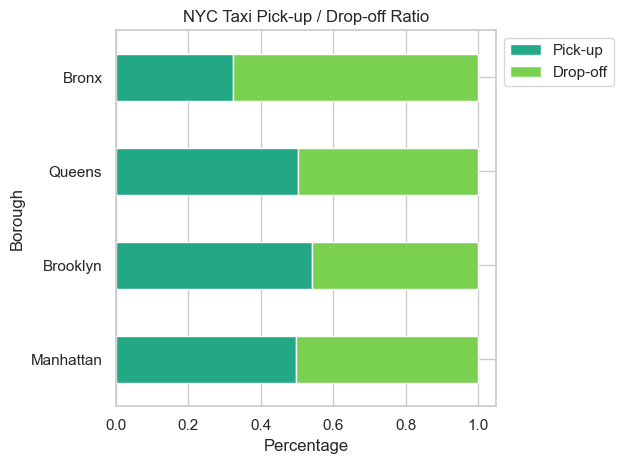

In [102]:
# Making a table of DO / PU ratio
PUtoDO = pd.DataFrame(df.groupby(by=['PUborough'])['PUdate'].count().reset_index())
PUtoDO = PUtoDO.rename(columns={'PUborough':'borough','PUdate': 'total PU'})
DOtoPU = pd.DataFrame(df.groupby(by=['DOborough'])['DOdate'].count().reset_index())
DOtoPU = DOtoPU.rename(columns={'DOborough':'borough','DOdate': 'total DO'})

PUtoDO = PUtoDO.merge(DOtoPU, on='borough', how='outer')
PUtoDO['Pick-up'] = PUtoDO['total PU'] / (PUtoDO['total PU'] + PUtoDO['total DO'])
PUtoDO['Drop-off'] = PUtoDO['total DO'] / (PUtoDO['total PU'] + PUtoDO['total DO'])
PUtoDO = PUtoDO[~PUtoDO['borough'].isin(['EWR', 'Staten Island'])] # dropping Staten Island and EWR since it doesnt have much significance
PUtoDO.set_index('borough', inplace=True)

# Pickup / Drop off Ratio
plt.figure(figsize=(5,5))
bar2 = PUtoDO[['Pick-up', 'Drop-off']].plot(kind='barh', stacked=True, color=viridis[3:5])
bar2.set_title('NYC Taxi Pick-up / Drop-off Ratio')
bar2.set_xlabel('Percentage')
bar2.set_ylabel('Borough')
bar2.legend(title='', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

**From this graphic we can conclude:**
- The only borough that have more dropoff ratio are Bronx, this indicates that most people from Bronx are not using the taxi services yet, but people who wants to go to Bronx does.

**Classifying each borough trip length**, 

we are going to classify the trip distance into a few categories:

| Trip Distance | Trip Length |
|-------------|-------------|
| 0.5-1 miles          | Very Short |
| 1-2 miles          | Short      |
| 2-3 miles          | Medium     |
| 3-5 miles          | Long       |
| > 5 miles          | Very Long  |

This will help us understand the culture and pattern of trip distance in each borough.

<Figure size 600x600 with 0 Axes>

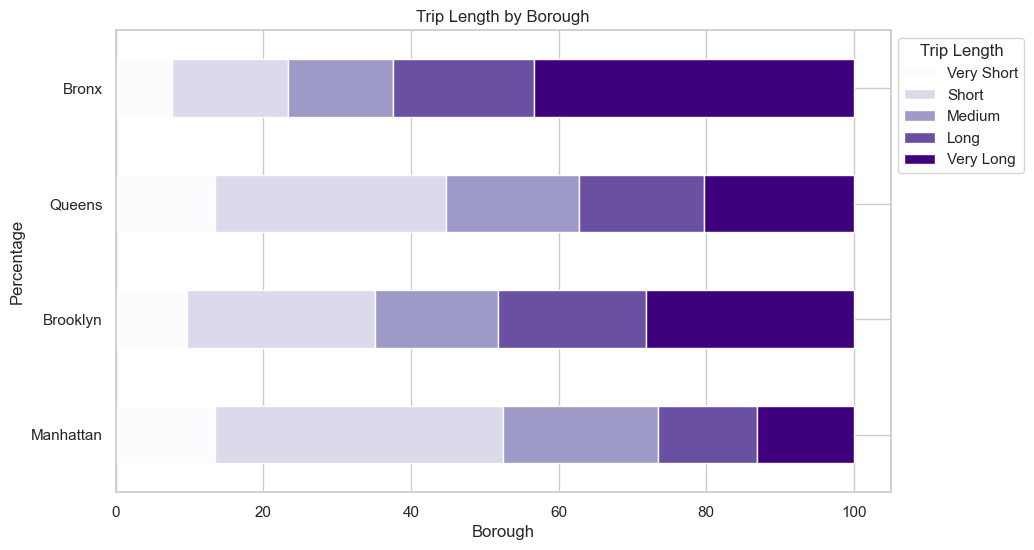

<Figure size 640x480 with 0 Axes>

In [103]:
# mapping the trip length
df['trip_length'] = np.where((df['trip_distance'] >= 0.5) & (df['trip_distance'] < 1), 'Very Short',
                              np.where((df['trip_distance'] >= 1) & (df['trip_distance'] < 2), 'Short',
                              np.where((df['trip_distance'] >= 2) & (df['trip_distance'] < 3), 'Medium',
                              np.where((df['trip_distance'] >= 3) & (df['trip_distance'] < 5), 'Long', 'Very Long'))))
df['trip_length'] = pd.Categorical(df['trip_length'], categories=lengthsorted, ordered=True)

# making a stacked bar for trip length
borlength = df.groupby(by=['trip_length','PUborough'])['PUtime'].count().to_frame().reset_index()
borlength = borlength[~borlength['PUborough'].isin(['EWR', 'Staten Island'])]
pivoted = borlength.pivot(index='PUborough', columns='trip_length', values='PUtime').fillna(0)

percentage = pivoted.div(pivoted.sum(axis=1), axis=0) * 100

plt.figure(figsize=(6,6))
ax = percentage.plot(kind='barh', stacked=True, figsize=(10, 6), width=0.5, colormap='Purples')

ax.set_title('Trip Length by Borough')
ax.set_xlabel('Borough')
ax.set_ylabel('Percentage')
plt.legend(title='Trip Length', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

plt.tight_layout()
plt.show()

**From this graphic we can conclude:**
- Each borough have a different patterns of trip length.
- The taxis in Manhattan rarely took long distance trips compared to those shorter trips.
- Bronx has the most proportion of Very Long trip.

**Understanding Payment Type**, each bar represents a borough's approach in taxi payments.

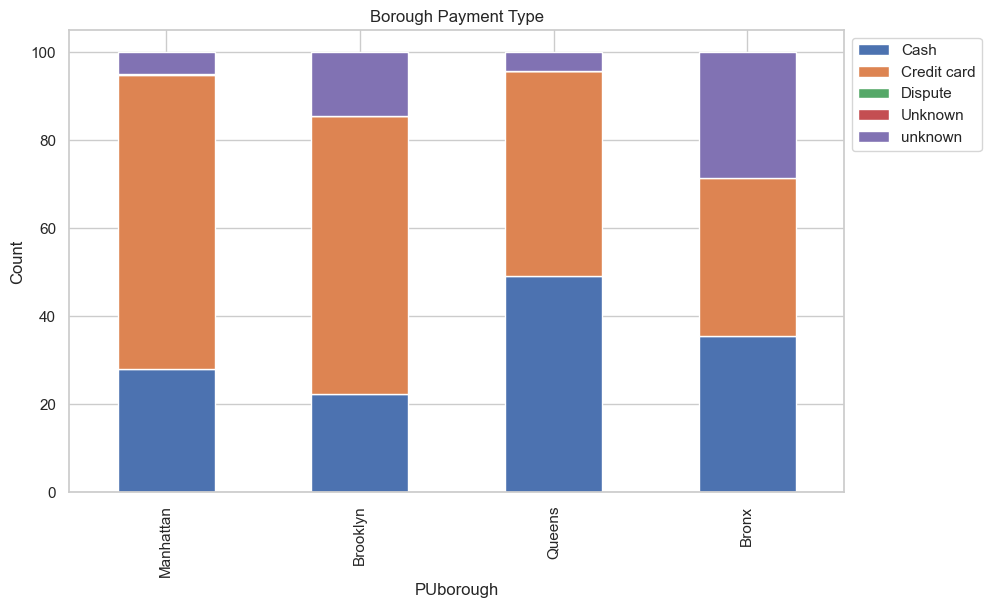

In [104]:
boroughpayment =df.groupby(['payment_type','PUborough'])['PUdate'].count().to_frame().reset_index()
boroughpayment = boroughpayment[~boroughpayment['PUborough'].isin(['EWR','Staten Island'])] 
pivot_data = boroughpayment.pivot_table(index='PUborough', columns='payment_type', values='PUdate', fill_value=0)
percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(10, 6))
percentage.plot(kind='bar', stacked=True, ax=ax, alpha=1)

ax.set_xlabel('PUborough')
ax.set_ylabel('Count')
ax.set_title('Borough Payment Type')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


**From this graphic we can conclude:**
- Most of the payments in **Manhattan** and **Brooklyn** are done with Credit Card, this shows that the people using the taxi are people who are more financially secured.
- In **Queens** and **Bronx** Cash are still the preferable option to pay. 

**Insights**

- Although NYC is a very big city, the culture or using taxis as a daily public transportation still centered towards **Manhattan**, that consist mainly of short to medium trips inside the district that distances in less that 3 miles and rarely gets on a long trip, so currently Manhattan is TLC's biggest consumer. 
- Most of the trips are done inside the district

- **Brooklyn** does have a higher average of percentage of fare contribution, meaning that even though the trips occurs way less frequent, but each of the trips are more valuable financially. This opens up many opportunities for new markets.

- Many inter-district trip are destinating towards Manhattan.

- **Staten Island** is culturally very distant from the other districts.

- Looking at the dropoff ratio, **Bronx** show that they have the needs for public transportation, it's just that the current taxi cab is not their first choice for pickup points. 

- **Staten Island** and **Bronx** are not a daily consumer of NYC's taxi services. It is an option to research further their market to see if thay are a liable options for expansions.

- Most people in **Manhattan** have already use Credit Cards as the preferable options of payments, showing their strength in financial security. This habit can be analyzed deeper to understand how to improve and innovate the financial system of the taxis.

### ***NYC's Taxis Trips Time Distribution***

**Daily trip distribution**, to understand the pattern of NYC taxis' busiest schedule we can make a plot distribution of each hours.

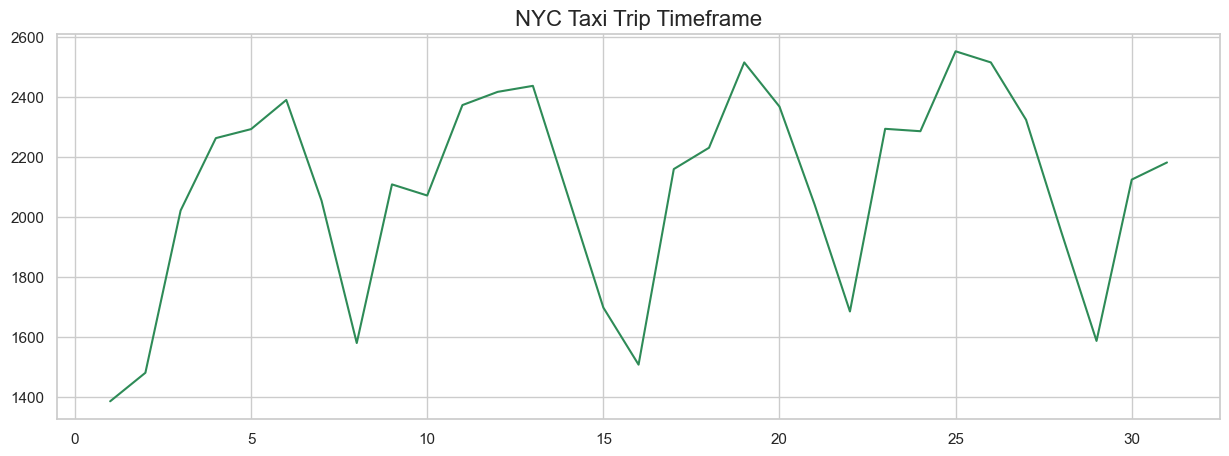

In [105]:
# making a plot of nyc taxi trips
trips = df.groupby(['PUdate','day']).count().reset_index()
trips['PUdate'] = trips['PUdate'].dt.day

plt.figure(figsize=(15,5))

plt.title('NYC Taxi Trip Timeframe', size=16)
plt.plot(trips['PUdate'],trips['PUtime'],markersize=40, color='seagreen')

plt.show()

**From this graphic we can conclude:**
- Most of the taxi trips came from the weekdays, with every weekends the volume of trips dip significantly.
- The taxi distributions each weeks are similar, indicating that there are pattern and reccuring customers using taxi daily.

**Hourly trip distribution per borough**, an hourly countplot of each boroughs to understand the trip pattern in hourly intervals.

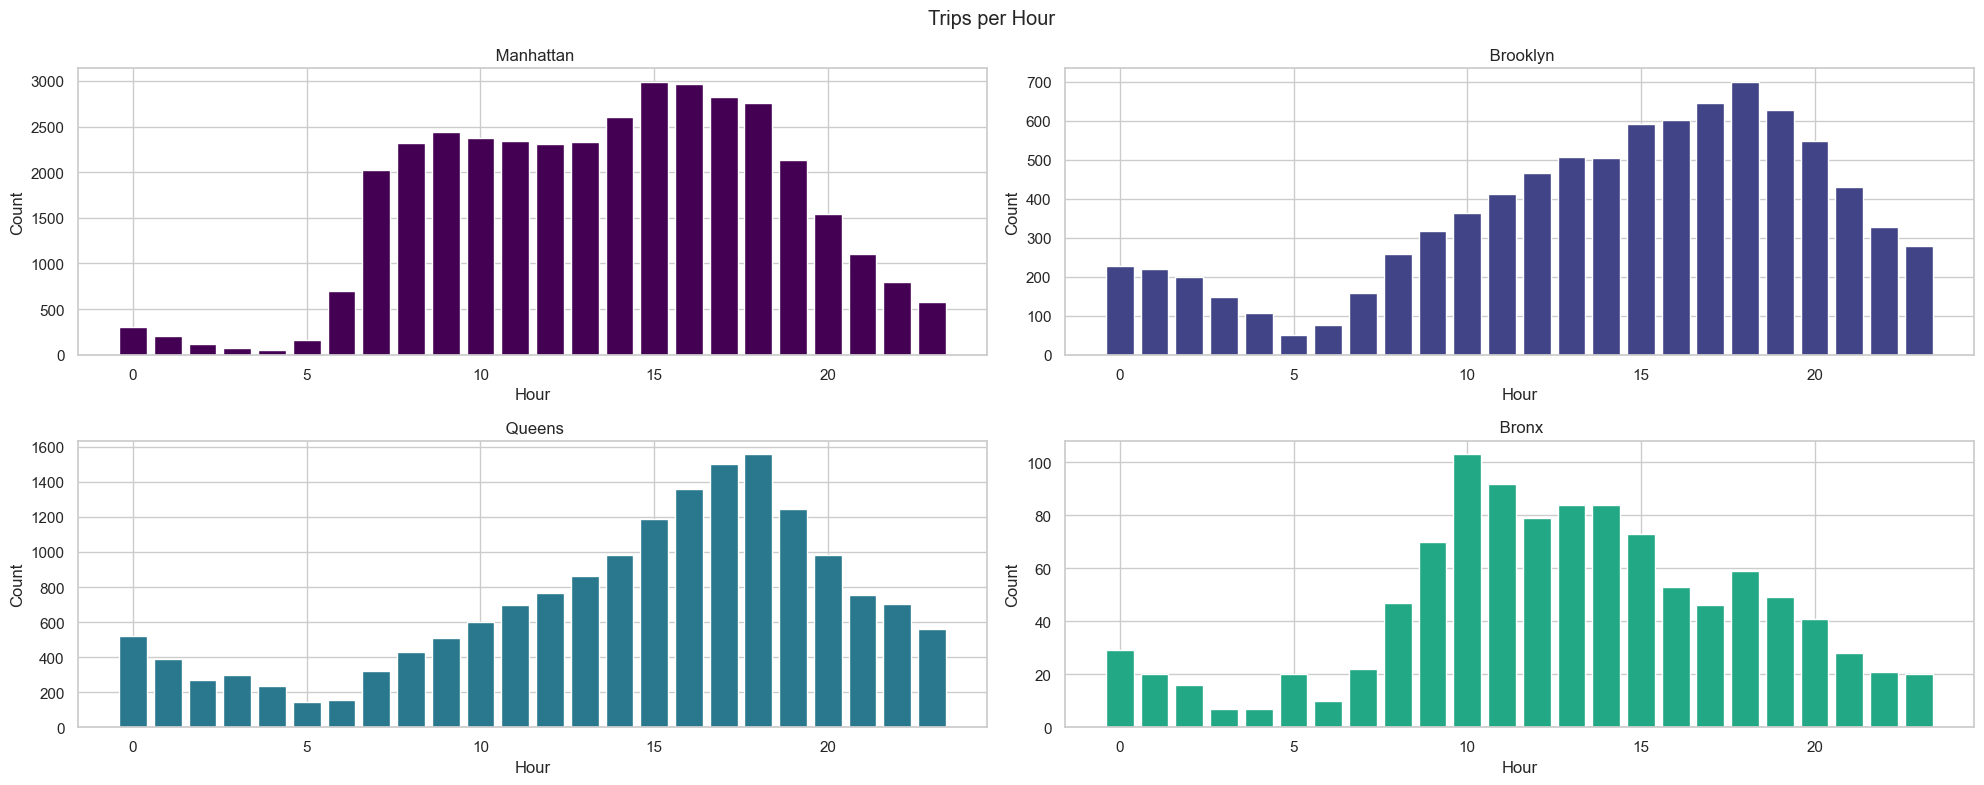

In [106]:

# making a countplot of trips in each hour of each borough
fig, axes = plt.subplots(2, 2, figsize=(20, 8))
plt.suptitle('Trips per Hour')

for i, borough in enumerate(boroughs):
    ax = axes[i // 2, i % 2]
    data_borough = df[df['PUborough'] == borough]
    
    # Count the number of trips per hour in this borough
    hour_counts = data_borough['hour'].value_counts().sort_index()
    hours = hour_counts.index
    counts = hour_counts.values

    # Create a bar plot using plt.bar
    ax.bar(hours, counts, color=viridis[i])
    ax.set_title(f' {borough}')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Count')

# Adjust the layout and display the subplots
plt.tight_layout()
plt.show()

**From this graphic we can conclude:**
- In terms of trip counts NYC's borough have various distribution.
 
- **Manhattan** has the busiest trip distribution throughout the day, ranging a high volume within 8AM to 8PM (workhour) making it the busiest borough of all.
- **Brooklyn** and **Queens** has a closely similar distribution, the busy hours are between 3PM to 8PM which is after work hours.
- **Bronx**'s distribution are quite different from the other, ranging a high volume at 10AM to 3PM.


**Congestion distribution**, to understand the pattern of NYC taxis' busiest schedule we can make a countplot distribution of each hours.

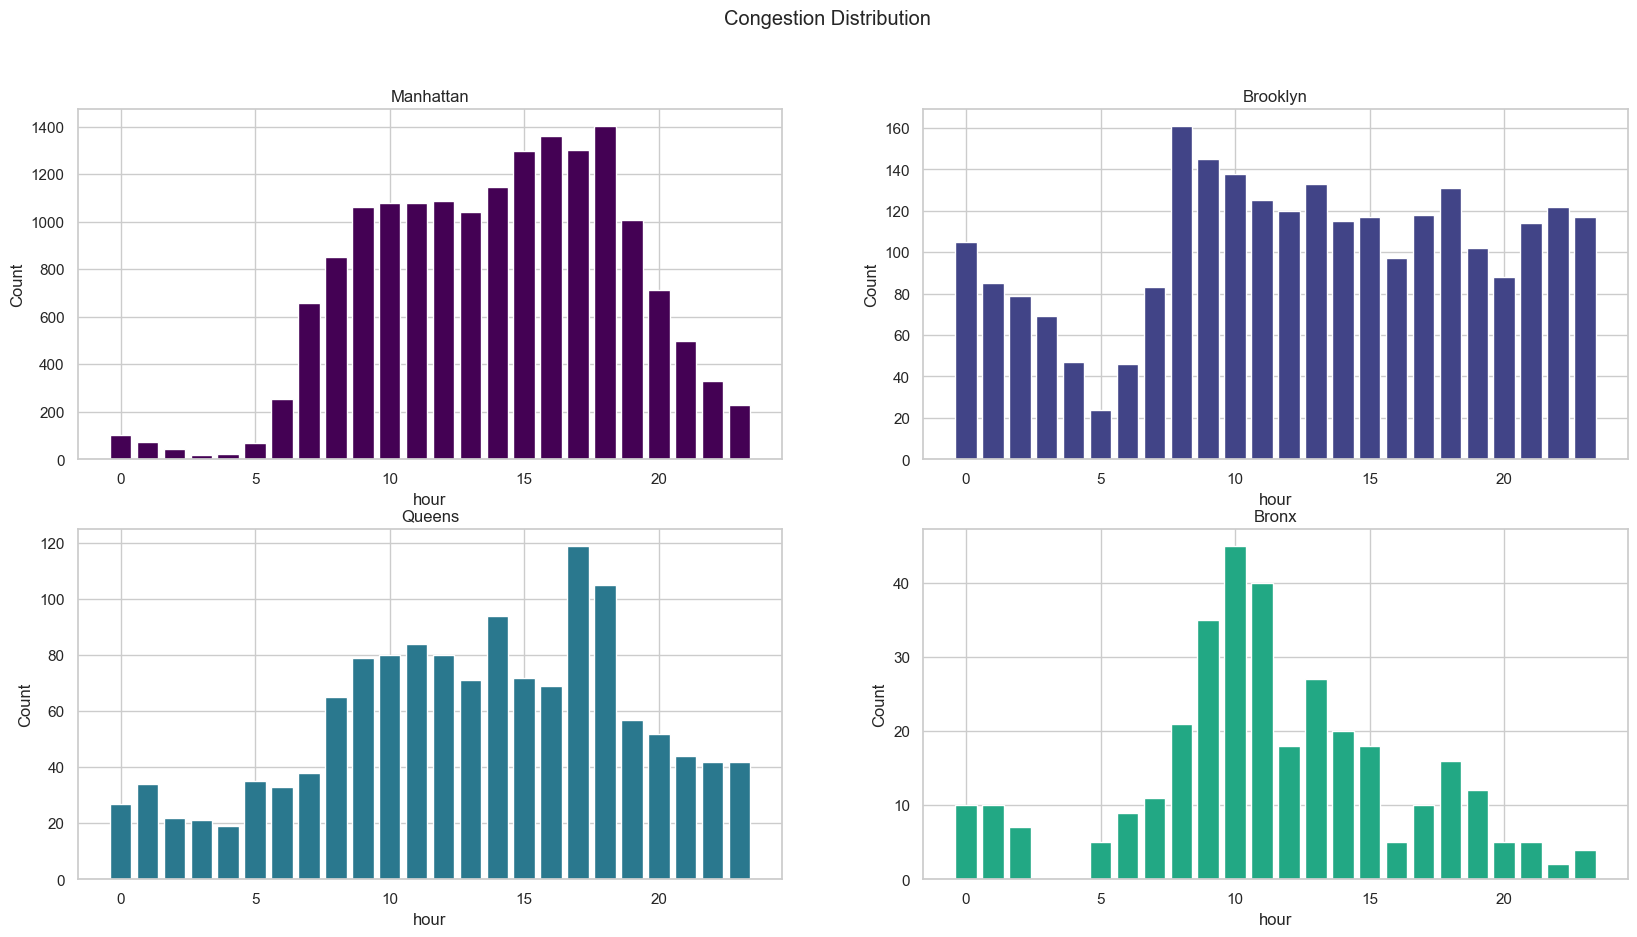

In [107]:
# making a countplot of congestion in each hour of each borough
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
plt.suptitle('Congestion Distribution')

for i, borough in enumerate(boroughs):
    ax = axes[i // 2, i % 2]
    data_borough = df[df['PUborough'] == borough]

    congestionsum = data_borough.groupby('hour')['congestion'].sum()
    hours = congestionsum.index
    counts = congestionsum.values

    ax.bar(hours, counts, color=viridis[i])
    ax.set_title(f'{borough}')
    ax.set_xlabel('hour')
    ax.set_ylabel('Count')

plt.show()

**From this graphic we can conclude:**
- Manhattan and Bronx has similar distribution of trips and congestions.

- Brooklyn and Queens's congestion distribution differs from the trips, particularly in the morning to noon. This might indicates that there are a correlation between congestion condition and their demand of trips.

***Correlation Testing : `congestion and trip volume`*** <br>

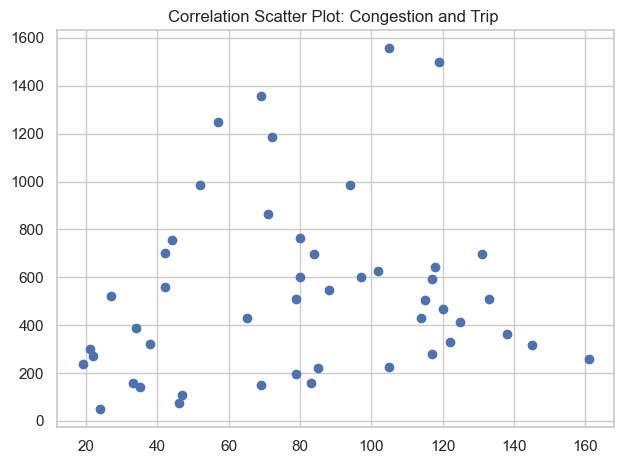

In [108]:
# making a scatterplot 
congestrip = df[['hour','congestion','PUborough']]
congestrip['trip'] = 1
congestrip = congestrip.groupby(['hour','PUborough'])[['trip','congestion']].sum().reset_index()
congestrip = congestrip[congestrip['PUborough'].isin(['Brooklyn','Queens'])]

plt.figure()
plt.title('Correlation Scatter Plot: Congestion and Trip ')
plt.scatter(congestrip['congestion'],congestrip['trip'])
plt.tight_layout()
plt.show()

In [109]:
# using pearson method to find correlation
correlation, p_value = pearsonr(congestrip['congestion'],congestrip['trip'])

print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson correlation coefficient: 0.15042022741223635
p-value: 0.3074950875697181


- The results of the correlation test shows that the congestion and trip type are **weakly correlated** which means that the hypothesis that congestion might be the reasons why there are decrease of demand is false. The low p-value suggests that this correlation are most likely happens randomly. <br >And it shows that the demand of taxi trips are not directly influenced by the congestion condition. 

**Insight**

- The signicant trip volume dip in the weekends shows that in NYC taxis are mainly used by the working class for daily purposes.

- **Manhattan**'s distribution of trips throughout the day ranges from work hour towards the evening, this might indicate that the high volume of usage comes from short to medium business trips.

- **Brooklyn** and **Queens**'s distribution shows a left skewed graph, indicating that taxi rides are more popular during afterhours and are not the primary mode of transportation for going to work in the morning.

- Congestion doesn't play a huge part in taxi trip's demand.


### ***Inter District vs Intra District trips***

The NYC taxi lets you do both inter and intra district trips with their cabs, in this part we are going to analyze the proportion of those trips and how they correlate with the time and day.

In [110]:
inter = df[['PUdate','PUborough','DOborough','day','hour','weekday/end']]
inter['inter/intra'] = np.where(df['PUborough']==df['DOborough'],'Intra','Inter')
inter = inter.groupby(by=['inter/intra','weekday/end','hour'])['PUdate'].count().to_frame().reset_index()
inter.rename(columns={'PUdate':'trip'}, inplace=True)
inter_weekday = inter[(inter['weekday/end'] == 'Weekday') & (inter['inter/intra'] == 'Inter')].set_index('hour')
inter_weekend = inter[(inter['weekday/end'] == 'Weekend') & (inter['inter/intra'] == 'Inter')].set_index('hour')
intra_weekday = inter[(inter['weekday/end'] == 'Weekday') & (inter['inter/intra'] == 'Intra')].set_index('hour')
intra_weekend = inter[(inter['weekday/end'] == 'Weekend') & (inter['inter/intra'] == 'Intra')].set_index('hour')

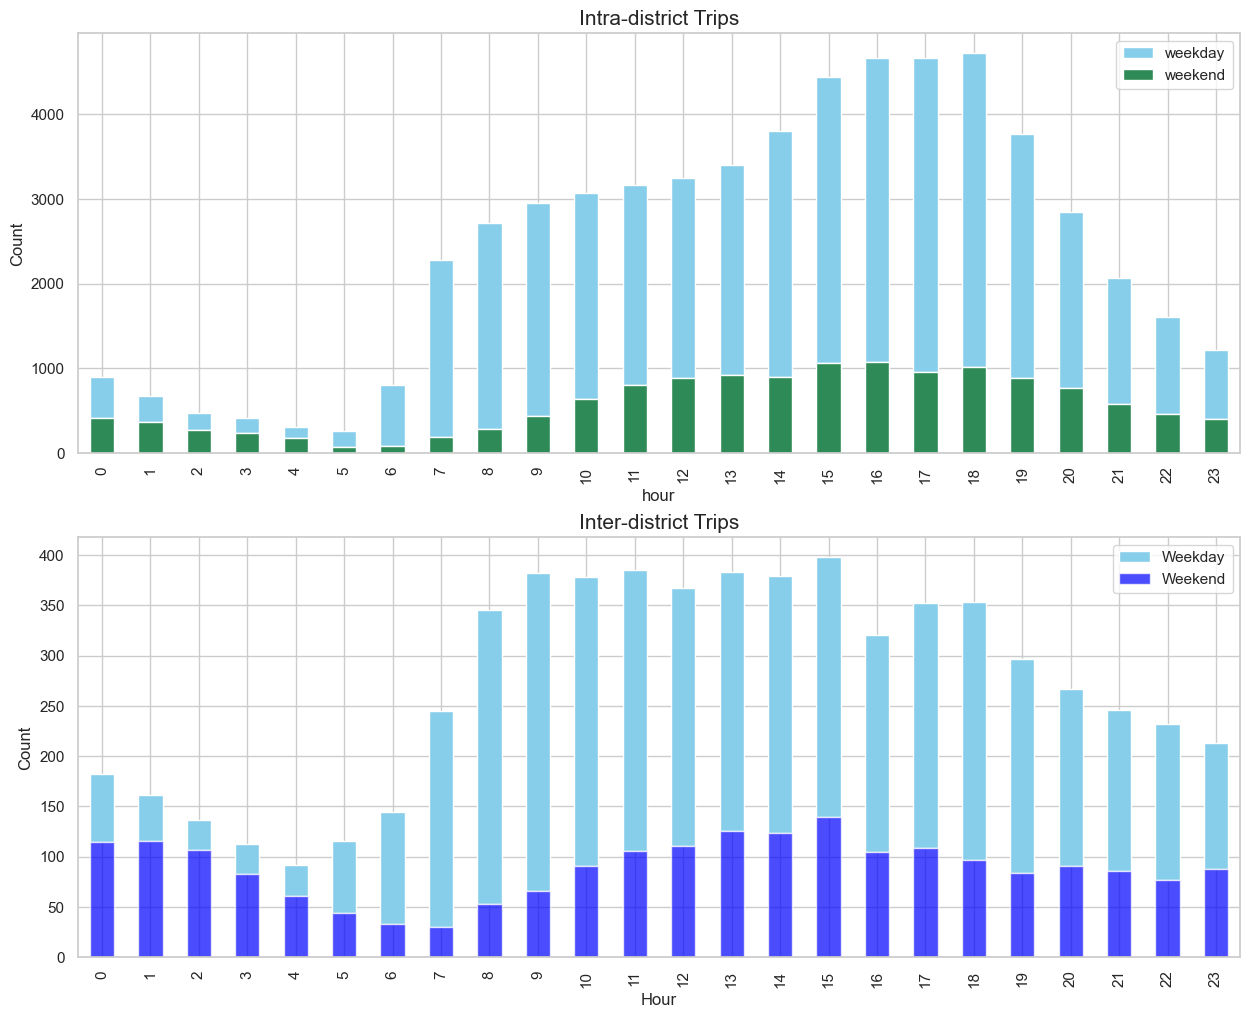

In [111]:
# makign a count plot of intra and inter district trips
plt.figure(figsize=(15, 12))
plt.subplot(2,1,1)
sns.set(style="whitegrid")

intra_weekday['trip'].plot(kind='bar',color='skyblue',label='weekday',alpha=1,bottom=intra_weekend['trip'])
intra_weekend['trip'].plot(kind='bar', color='seagreen',label='weekend',alpha=1)
plt.ylabel('Count')
plt.title('Intra-district Trips',size=15)
plt.legend()

plt.subplot(2,1,2)
sns.set(style="whitegrid")

inter_weekday['trip'].plot(kind='bar', color='skyblue',label='Weekday',alpha=1,bottom=inter_weekend['trip'])
inter_weekend['trip'].plot(kind='bar',color='blue',label='Weekend',alpha=0.7)

plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Inter-district Trips',size=15)
plt.legend()
plt.show()


**From this graphic we can conclude:**
- Most of the trips in NYC are happening inside the district.

- Inter-district tips has a higher proportion in the weekends.
- Inter-district trips that occur before 4AM are likely to happen in the weekend

***Hypothesis Testing : `weekend intercity trip`*** <br>

Null Hypothesis (H0): In the weekend the proportion of inter trips = intra trips

Alternative Hypothesis (H1):  In the weekend the proportion of inter trips >  intra trips

To test this hypothesis, we are going to use the ***Two-sample Independent T-test*** method.

In [112]:
inter['proportion'] = inter.groupby('inter/intra')['trip'].transform(lambda x: x / x.sum())
# making proportion
inter2 = inter[inter['inter/intra']=='Inter']  # filtering intra/inter
intra = inter[inter['inter/intra']=='Intra'] # filtering intra/inter
# two sample independent t-test
test_result = ttest_ind(
              a=inter2[inter2['weekday/end'] == 'Weekend']['proportion'],
              b=intra[intra['weekday/end'] == 'Weekend']['proportion'],
              equal_var=False, 
              alternative='greater',
            )

print('P-Value:', test_result.pvalue)

if test_result.pvalue < 0.05:
    print('H0 Rejected')
else:
    print('H0 Acceped')

P-Value: 0.0065885848150949835
H0 Rejected


- The results of the hypothesis testing shows that in the weekend, the proportion of inter-district trips are higher than intra-district trips.

**Insight:**
- Using the Two-sample Independent T-test, the null hypothesis was rejected, this indicates that there are enough evidence that the proportion of inter trips is higher the weekend rather than the weekdays.

- This means that in the weekends, taxi is a preferable options of transportation for inter-district trips. 

### ***NYC's Attitude Towards Tipping***

Tipping has been an essential aspect in taxi cabs, besides generating extra cash for the drivers, tipping also a representation about the passenger financial decision-making. 

#### Central of Tendencies

In [113]:

# a summary of df's central of tendency
print(f'''
NYC Taxi Tipping :
----------------------------
Range : {df[df['tip_amount']!=0]['tip_amount'].min()} - {df['tip_amount'].max()}
Median : {df['tip_amount'].median()}
Mean : {df['tip_amount'].mean().round(2)}
----------------------------
Range : {df[df['tip%']!=0]['tip_amount'].min()} % -  {df['tip%'].max().round()} %
Median : {df['tip%'].median().round()} %
Mean : {df['tip%'].mean().round(2)} %
      ''')


NYC Taxi Tipping :
----------------------------
Range : 0.01 - 33.94
Median : 1.8
Mean : 2.14
----------------------------
Range : 0.01 % -  46.0 %
Median : 9.0 %
Mean : 9.09 %
      


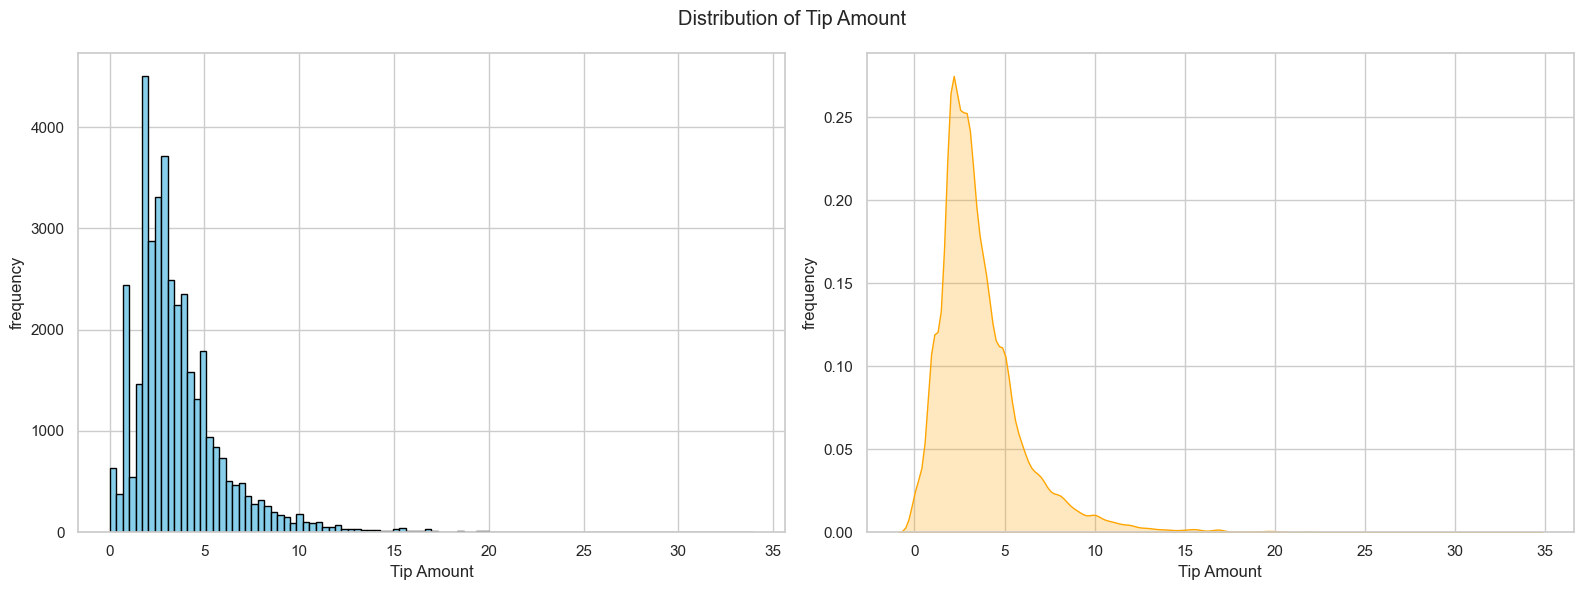

In [114]:
tip_amount = df[df['tip_amount'] != 0]['tip_amount']
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plt.suptitle('Distribution of Tip Amount')

axes[0].hist(tip_amount, bins=100, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Tip Amount')
axes[0].set_ylabel('frequency')

sns.kdeplot(tip_amount, color='orange', shade=True, ax=axes[1])
axes[1].set_xlabel('Tip Amount')
axes[1].set_ylabel('frequency')


plt.tight_layout()
plt.show()


**From these graphic we can conclude:**
- The distribution of the tips is right skewed, and the mean and median are not very far.
- This shows that the tipping pattern of NYC are akin.
- The Central Tendency shows that the tips are ranging in the value of 0$-33$
- The Central Tendency shows that the tips percentage are ranging in the value of 0.0.1%-46%


**Tip to total amount**, the area graph are used to see the trends of tips value in comparisons to the fare amount and other fare.

In [115]:
area = df.groupby(by=['PUborough','hour'])[['fare_amount','other_fare','tip_amount','total_amount']].sum().reset_index()
for i, borough in enumerate(boroughs):
    fig = px.area(area[area['PUborough']==borough], x='hour', y=['fare_amount','other_fare', 'tip_amount'],
    width=1000, height=300)
    fig.show()

**From these graphs we can conclude**

- The tip amount are in tune with the other fare, meaning that the passengers usually tips the taxi drivers according to the amount of cost they have to pay

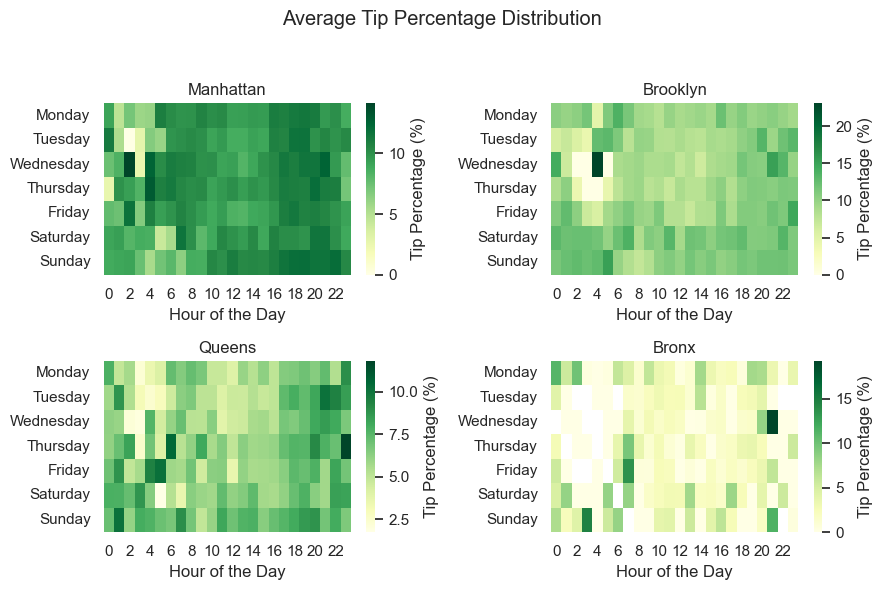

In [116]:
fig, axes = plt.subplots(2, 2, figsize=(9, 6))
plt.suptitle('Average Tip Percentage Distribution')
# making the heatmap of tips percentage
for i, borough in enumerate(boroughs):
    row, col = divmod(i, 2) 
    ax = axes[row, col]
    
    heatmap_data = df[df['PUborough'] == borough].pivot_table(index='day', columns=df['PUtime'].dt.hour, values='tip%', aggfunc='mean').reset_index()
    
    heatmap_data['day'] = pd.Categorical(heatmap_data['day'], categories=daysorted, ordered=True)
    heatmap_data = heatmap_data.sort_values('day')
    heatmap_data = heatmap_data.set_index('day')
    heatmap_data = heatmap_data.sort_index()
    
    sns.heatmap(heatmap_data, cmap='YlGn', cbar_kws={'label': 'Tip Percentage (%)'}, ax=ax)
    ax.set_title(f'{borough}')
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('')
    ax.grid(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**From these graphic we can conclude:**
- **Manhattan** is the borough with the most consistency in terms of tipping. In the weekdays the tipping value have a denser volume at the work hour, while at the weekend it is denser in the afternoon all the way to midnight.
- **Brooklyn, Queens** and **Bronx**'s tipping distribution are less consistence. Centering in a few time of the hours only without precise pattern.

**Classifying the tipping amount**,


we are going to classify the tip amoung into a few categories:


| Tip Class        | Tip (% of total amount)|
|------------------|--------------|
| Cash | 0 (with cash as payments)
| No tip           | 0          |
| Modest           | 0% - 10%         |
| Moderate         | 10% - 15%       |
| Generous         | 15% -20%       |
| Very Generous    | > 20%        |

This will help us understand the culture and pattern of tipping amount in each borough.


In [117]:
# making a new column consisting of the classified trip class
df['tip_class'] = np.where(df['tip%'] >= 20, 'Very Generous',
            np.where(df['tip%'] >= 15, 'Generous',
            np.where(df['tip%'] >= 10, 'Moderate',
            np.where(df['tip%'] > 0, 'Modest',
            np.where(df['payment_type'].isin(['Cash']),'Cash',
            'No tip')))))
df['tip_class'] = pd.Categorical(df['tip_class'], categories=classsorted, ordered=True)

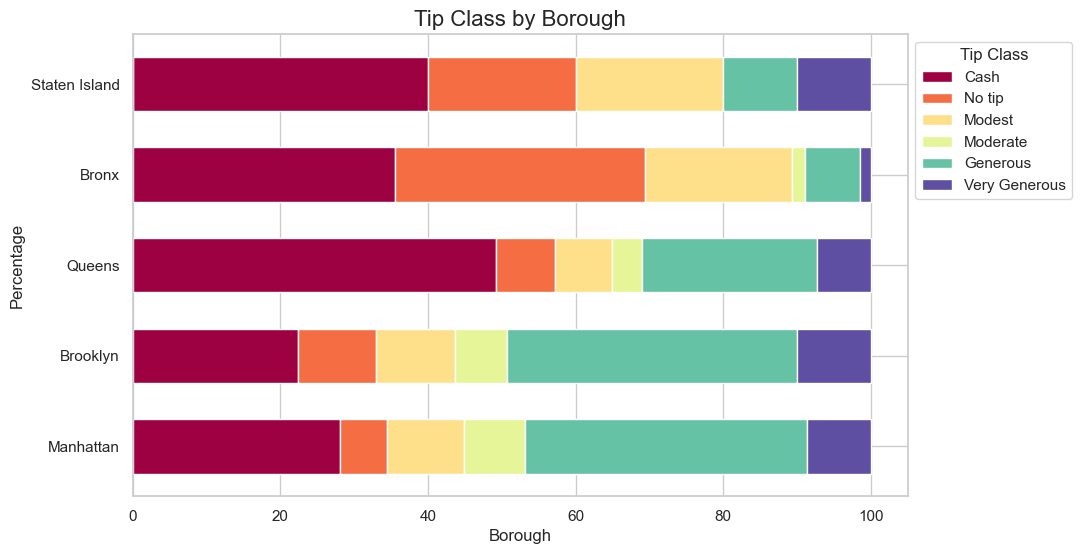

In [118]:
# making a stacked barplot consisting of the tip class by borough
tipclass = df.groupby(['PUborough','tip_class'])['PUtime'].count().reset_index()
pivot_tip = tipclass.pivot(index='PUborough', columns='tip_class', values='PUtime').fillna(0)

pivot_tip_percentage = pivot_tip.div(pivot_tip.sum(axis=1), axis=0) * 100
pivot_tip_percentage.dropna(inplace=True)

ax = pivot_tip_percentage.plot(kind='barh', stacked=True, figsize=(10, 6), width=0.6, colormap='Spectral')

ax.set_title('Tip Class by Borough', size=16)
ax.set_xlabel('Borough')
ax.set_ylabel('Percentage')
plt.legend(title='Tip Class', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**From this graphic we can conclude:**
- More people in **Manhattan** and **Brooklyn** are giving a generous amount of trip, indirectly describing their benevolence in their financial ability.

- In borough like **Queens** and **Bronx** there are less people that gives very generous amount of tips, but with their huge proportion of cash payments this might be affected the recording of the tips.

**Insights:**
- The taxi passengers in Manhattan are more generous towards tipping, meaning that the people are more willing to pay extra cash for a service.

- The tip amount is heavily relative to the fare and total amount that needed to be paid.

### **Off-to-work Hours** 

After analyzing the NYC trips pattern, it is concluded that most of the taxi users are people in the need of transportation going in-and-out of work. The question is now how can we use this information to reduce costs and enchance efficiency.

Off-to-work hours (7AM-10AM) are the times when high number of people are going to work simultenaously. 

In [119]:
# making a aggregated table of the top 5 DOzone
offtowork = df[df['hour'].isin([7,8,9,10])]
offtowork = offtowork[offtowork['weekday/end']=='Weekday'] # eliminating weekends data
offtowork = offtowork[['DOzone','hour','PUdate']]
offtowork = offtowork.groupby(['DOzone'])['PUdate'].count().to_frame().sort_values(by='PUdate',ascending=False).head(5)
offtowork.rename(columns={'PUdate':'Trips on AVG'}, inplace=True)
offtowork['Trips on AVG'] = (offtowork['Trips on AVG'] / 23).round() # averaging per day - minus weekends 31 - (2*4) 
offtowork

,Trips on AVG
DOzone,
East Harlem South,48.0
East Harlem North,27.0
Morningside Heights,26.0
Upper East Side North,26.0
Central Harlem,22.0


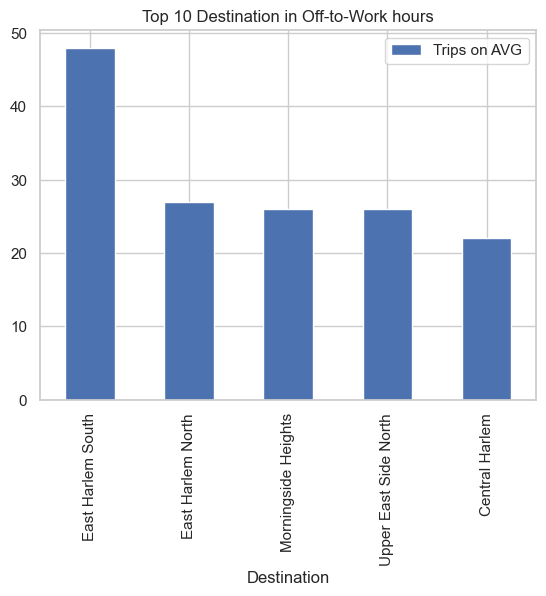

In [120]:
offtowork.plot(kind='bar')
plt.title('Top 10 Destination in Off-to-Work hours')
plt.xlabel('Destination')
plt.show()

**Insight**
- The top 5 destination zone in the off-to-works hours on average have 26-56 peple going to the same destination, meaning that this might be a communal or cultural trend to use taxi to these area. This indicates that NYC taxis are a preferable option of going to work transportations.

## **Conclusions and Reccomendation**


***Main Takeaways:***
***

1. Although NYC Taxis are monumental and iconic towards NYC's reputation, their usage are centered mainly in **Manhattan**, and borough like Bronx and Staten Island are pretty far from reach of this public transportations.

2. NYC taxis are mostly used as a **work transportation**, consisting of short to medium intra-district trips during work hours.

3. For inter-district trips, NYC taxis are not preferable, this could be affected by the various less expensive public transportation in New York.

4. Looking at the dropoff ratio, **Bronx** show that they have the needs for public transportation, it's just that the current taxi cab is not their first choice for pickup points. 

5. **Manhattan** taxi passengers are likely to be more financially secure than other, looking from their credit card payments proportions and their generous and consistent tipping behaviour.


**Recommendations:**
***

***On district expansion:***
- Although the trips are mostly centered in Manhattan, boroughs like **Brooklyn** and **Queens** shows that there are demands from consumers. NYC Taxi companies need to think diversely, better understanding of the culture and behaviours, the time patterns of the needed trips and the financial capabilities of the people are vital towards the process of expansions.

    ***for example***
    Based on the data, **Brooklyn and Queens** have a busy hours at afternoon (15PM-20PM) and more proportions of demand in the before dawn (12AM-4AM), so taxis at these areas can be deployed to maximize the trip supplies.


- Boroughs like Staten Island and Bronx has less demands and interest in using taxis as public transportation, so it is better to minimize putting markers in there, which eventualy there are less odds of trips occured.


***On off-to-work hours:***
- During *off-to-works* hour, companies can offer **Carpooling services** where multiple people can share a taxi with splitted fare, since most of the trips occured in that time is a 1 passenger trip, this could increase the number of new passengers (considering that the demand to the destination is high) and it also cut a lot of cost for the drivers and company.

    ***for example***
    If the normal rate going to *East Harlem* is 8$ per miles for 1 persons, with carplooling 2 persons can join in togehter and pay the splitted fare of 4.5$ per persons. This cut their expenses by 45% while increasing the drivers revenue by 12%.


***On payment system:***
- Points system for credit cards user can be implemented, espescially in **Manhattan** where the demand and mobility is high and fast paced, this could attracts people to use the taxi more frequently for some extra miles.

- In times where financial technology is dominating the money market, TLC could add a more centralized digital payment system that offers more features. Since more and more people are migrating to cashless payments and not cash-ready anymore.

***On Inter-district trips:***
- Inter-district trips are less frequent to occur likely due to other less expensive alternatives of public transportation like Subway or Trem, what the taxi companies can do is to optimize this by joining forces with them.

     ***for example***
     Make partnerships with the subway companies, where there would be a package services that consume can buy that lets them use subway for their inter-district trips and getting taxi trips from the subway station to their home or offices.

**Exporting new data for visualization**

In [121]:
df['count'] = 1
df.to_csv(r"data/NYC TLC Trip Record (tableau).csv", index=None, header=True)